In [47]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
#importing libraries
from keras.layers import Dense
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import EarlyStopping

In [9]:
#reding data
df=pd.read_csv('Amar Alli - data.csv')

In [10]:
df

,Date,Close
0,01 10 2014,434.000000
1,07 10 2014,431.225006
2,08 10 2014,433.799988
3,09 10 2014,443.799988
4,10 10 2014,433.649994
...,...,...
2098,06 04 2023,1666.349976
2099,10 04 2023,1658.449951
2100,11 04 2023,1663.300049
2101,12 04 2023,1684.900024


In [11]:
#converting date feature from object to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

C:\Users\amarc\AppData\Local\Temp\ipykernel_18768\572645043.py:1: UserWarning: Parsing '13 10 2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\amarc\AppData\Local\Temp\ipykernel_18768\572645043.py:1: UserWarning: Parsing '14 10 2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\amarc\AppData\Local\Temp\ipykernel_18768\572645043.py:1: UserWarning: Parsing '15 10 2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\amarc\AppData\Local\Temp\ipykernel_18768\572645043.py:1: UserWarning: Parsing '16 10 2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\amarc\AppData\Local\Temp\ip

In [12]:
#checking null values
df.isnull().sum()

Close    0
dtype: int64

In [13]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2103 entries, 2014-01-10 to 2023-04-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2103 non-null   float64
dtypes: float64(1)
memory usage: 32.9 KB


In [14]:
#final data
df

,Close
Date,
2014-01-10,434.000000
2014-07-10,431.225006
2014-08-10,433.799988
2014-09-10,443.799988
2014-10-10,433.649994
...,...
2023-06-04,1666.349976
2023-10-04,1658.449951
2023-11-04,1663.300049


In [15]:
#splitting data into train and test
split_date = pd.Timestamp('2022-04-13')
train_set = data.loc[:split_date, ['Close']]
test_set = data.loc[split_date:, ['Close']]

train_set.shape, test_set.shape

((1856, 1), (248, 1))

In [17]:
#scaling data
mm = MinMaxScaler()
trains = mm.fit_transform(train_set)
tests = mm.transform(test_set)

train_set = pd.DataFrame(trains, columns=['Close'])
test_set = pd.DataFrame(tests, columns=['Close'])

In [19]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60,train_set.shape[0]-1):
    X_train.append(train_set.iloc[i-60:i,0])
    y_train.append(train_set.iloc[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

## Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (X_train.shape[0], 1,1))
X_train.shape, y_train.shape

((1795, 60, 1), (1795, 1, 1))

In [21]:
# Creating a data structure with 60 timesteps and 1 output
X_test = []
y_test = []

for i in range(60,247):
    X_test.append(test_set.iloc[i-60:i,0])
    y_test.append(test_set.iloc[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)

## Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape, y_test.shape

((187, 60, 1), (187,))

In [33]:
#early stopage
early_stop = EarlyStopping(monitor='loss', patience=4)

In [23]:
## Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = np.reshape(y_train, (X_train.shape[0], 1))
X_train.shape, y_train.shape

((1795, 60), (1795, 1))

In [24]:
## Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = np.reshape(y_test, (X_test.shape[0], 1))
X_test.shape, y_test.shape

((187, 60), (187, 1))

# ANN

In [82]:
#model building
K.clear_session()
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=(60)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1952      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [83]:
#fitting data
model.fit(X_train, y_train, batch_size=100, epochs=10, callbacks=[early_stop])

Epoch 1/10
18/18 [==============================] - 1s 3ms/step - loss: 0.0383 - mse: 0.0383
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0043 - mse: 0.0043
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 8/10
18/18 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 9/10
18/18 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 10/10
18/18 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014


In [84]:
#predicting X_train
y_train_pred = model.predict(X_train)

57/57 [==============================] - 0s 2ms/step


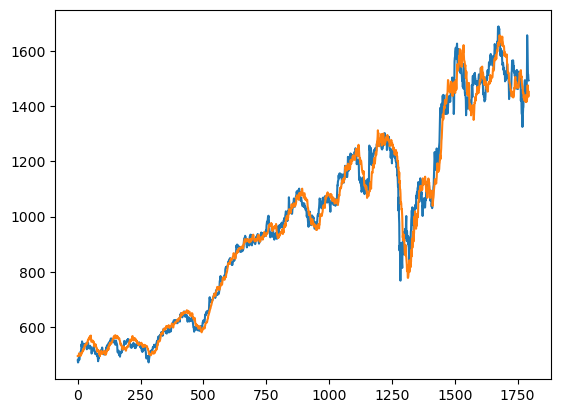

In [85]:
#plotting train vs predicted values
y_trainr = mm.inverse_transform(y_train)
y_train_predr = mm.inverse_transform(y_train_pred)

plt.plot(y_trainr)
plt.plot(y_train_predr)
plt.show()

In [86]:
#model evaluation by metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print('RMSE on Training is:',rmse_train)
print('r2_score on Training is:',r2_train)

RMSE on Training is: 0.03739792919440219
r2_score on Training is: 0.9812224408679803


In [87]:
#predicting X_test
y_test_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_pred))

6/6 [==============================] - 0s 2ms/step


0.04812365449319312

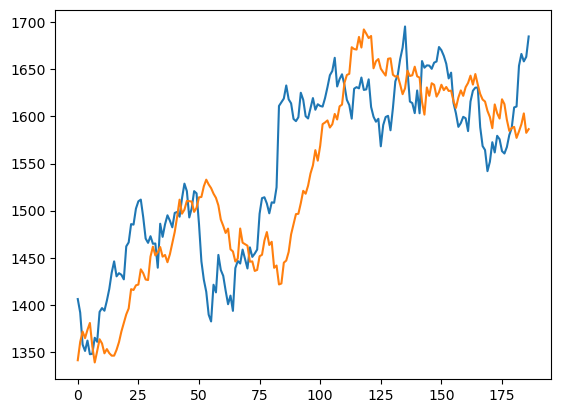

In [88]:
#plotting test vs predicted values
y_testr = mm.inverse_transform(y_test)
y_test_predr = mm.inverse_transform(y_test_pred)

plt.plot(y_testr)
plt.plot(y_test_predr)
plt.show()

In [89]:
#model evaluation by metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print('RMSE on Test is:',rmse_test)
print('r2_score on Test is:',r2_test)

RMSE on Test is: 0.04812365449319312
r2_score on Test is: 0.5662482662977928


### Plot the behaviour of loss and performance with epochs.

In [98]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)



Epoch 1/50
57/57 [==============================] - 0s 4ms/step - loss: 2.0566e-04 - mse: 2.0566e-04 - val_loss: 2.6928e-04 - val_mse: 2.6928e-04
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 2.1362e-04 - mse: 2.1362e-04 - val_loss: 2.6662e-04 - val_mse: 2.6662e-04
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 2.0895e-04 - mse: 2.0895e-04 - val_loss: 2.7283e-04 - val_mse: 2.7283e-04
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 1.9220e-04 - mse: 1.9220e-04 - val_loss: 2.9790e-04 - val_mse: 2.9790e-04
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 2.0534e-04 - mse: 2.0534e-04 - val_loss: 2.7080e-04 - val_mse: 2.7080e-04
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 2.2776e-04 - mse: 2.2776e-04 - val_loss: 3.5370e-04 - val_mse: 3.5370e-04
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 2.1178e-04 - mse: 2.1178e-04 - val_loss: 3.4833e-04 

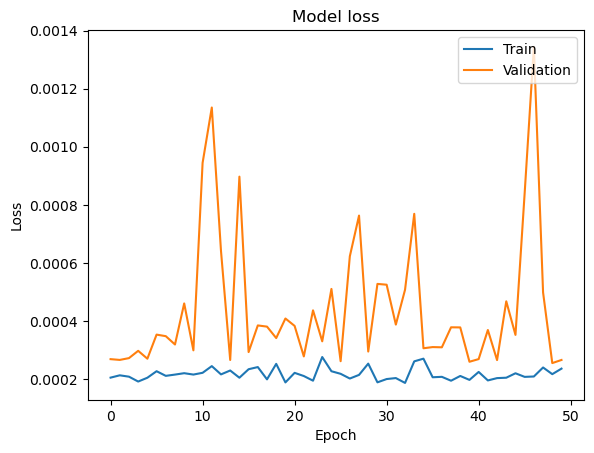

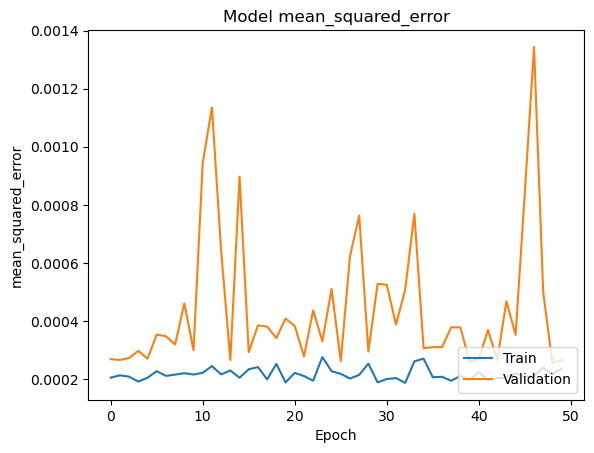

In [99]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


# RNN

In [70]:
#importing libraries
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [71]:
#early stoppage
early_stop = EarlyStopping(monitor='loss', patience=4)

In [72]:
#model building
K.clear_session()

model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape=(60,1)))
model.add(Dropout(rate=0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(50))
model.add(Dropout(rate=0.2))

# The output layer
model.add(Dense(units=1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            30200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [73]:
#Reshpe
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (X_train.shape[0], ))
X_train.shape, y_train.shape

((1795, 60, 1), (1795,))

In [74]:
#reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (X_test.shape[0], ))
X_test.shape, y_test.shape

((187, 60, 1), (187,))

In [75]:
#model fitting
model.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
90/90 [==============================] - 28s 199ms/step - loss: 0.0175
Epoch 2/20
90/90 [==============================] - 18s 199ms/step - loss: 0.0044
Epoch 3/20
90/90 [==============================] - 17s 192ms/step - loss: 0.0036
Epoch 4/20
90/90 [==============================] - 18s 196ms/step - loss: 0.0041
Epoch 5/20
90/90 [==============================] - 18s 200ms/step - loss: 0.0034
Epoch 6/20
90/90 [==============================] - 18s 205ms/step - loss: 0.0039
Epoch 7/20
90/90 [==============================] - 19s 211ms/step - loss: 0.0032
Epoch 8/20
90/90 [==============================] - 18s 196ms/step - loss: 0.0033
Epoch 9/20
90/90 [==============================] - 18s 196ms/step - loss: 0.0028
Epoch 10/20
90/90 [==============================] - 17s 192ms/step - loss: 0.0032
Epoch 11/20
90/90 [==============================] - 19s 212ms/step - loss: 0.0028
Epoch 12/20
90/90 [==============================] - 19s 212ms/step - loss: 0.0023
Epoch 13/20
9

In [76]:
#predicting X_train
y_train_pred = model.predict(X_train)

57/57 [==============================] - 42s 62ms/step


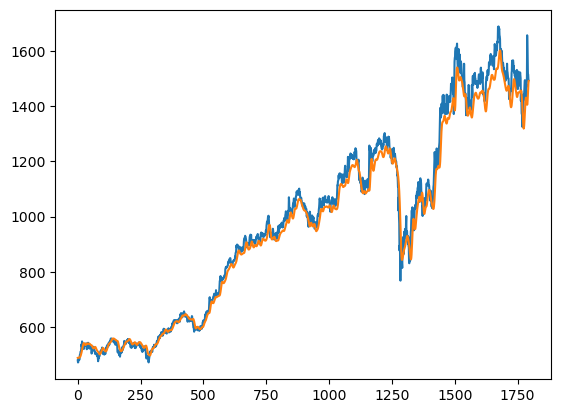

In [77]:
#plotting train vs predicted values
y_train = np.reshape(y_train, (X_train.shape[0],1))
y_trainr = mm.inverse_transform(y_train)
y_train_predr = mm.inverse_transform(y_train_pred)

plt.plot(y_trainr)
plt.plot(y_train_predr)
plt.show()

In [78]:
#model evaluation by metrics
rmse_train_rnn = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train_rnn = r2_score(y_train, y_train_pred)
print('RMSE on Training is:',rmse_train_rnn)
print('r2_score on Training is:',r2_train_rnn)

RMSE on Training is: 0.03523799516671725
r2_score on Training is: 0.9833288172781196


In [79]:
#predicting X_test
y_test_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_pred))

6/6 [==============================] - 0s 41ms/step


0.05973458375705152

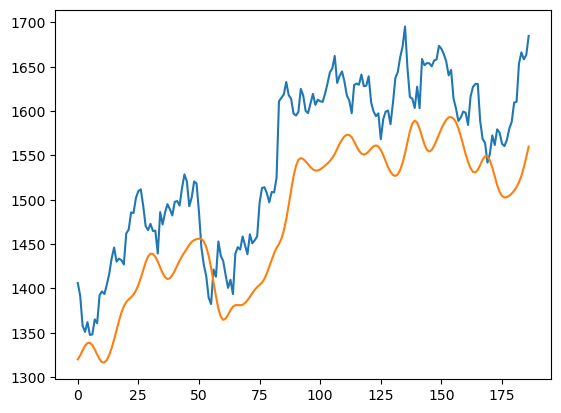

In [80]:
#ploting test vs predicted values
y_test = np.reshape(y_test, (X_test.shape[0],1))
y_testr = mm.inverse_transform(y_test)

y_test_predr = mm.inverse_transform(y_test_pred)

plt.plot(y_testr)
plt.plot(y_test_predr)
plt.show()

In [81]:
#model evaluation by metrics
rmse_test_rnn = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test_rnn = r2_score(y_test, y_test_pred)
print('RMSE on Test is:',rmse_test_rnn)
print('r2_score on Test is:',r2_test_rnn)

RMSE on Test is: 0.05973458375705152
r2_score on Test is: 0.3316934662337815


## Parameters Explanation

The total number of parameters in this model can be calculated as follows:

For the first LSTM layer, the number of parameters is:

4 x (input_dim + output_dim) x output_dim + 4 x output_dim^2
4 x (1 + 100) x 100 + 4 x 100^2 = 40800
For the first Dropout layer, there are no trainable parameters.

For the second LSTM layer, the number of parameters is:

4 x (input_dim + output_dim) x output_dim + 4 x output_dim^2
4 x (100 + 50) x 50 + 4 x 50^2 = 30200
For the second Dropout layer, there are no trainable parameters.

For the third LSTM layer, the number of parameters is:

4 x (input_dim + output_dim) x output_dim + 4 x output_dim^2
4 x (50 + 50) x 50 + 4 x 50^2 = 20200
For the third Dropout layer, there are no trainable parameters.

For the fourth LSTM layer, the number of parameters is:

4 x (input_dim + output_dim) x output_dim + 4 x output_dim^2
4 x (50 + 50) x 50 + 4 x 50^2 = 20200
For the fourth Dropout layer, there are no trainable parameters.

For the output Dense layer, the number of parameters is:

(input_dim + 1) x output_dim
(50 + 1) x 1 = 51
Therefore, the total number of trainable parameters in this RNN model is:

40800 + 30200 + 20200 + 20200 + 51 = 111451
